<a href="https://colab.research.google.com/github/ashikdas-MobileCastle/TFLite-DigitRecognizer/blob/master/TFLite_model_for_predict_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
keras = tf.keras
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


Load MNIST Dataset

In [0]:
#Load mnist from keras datasets
mnist = keras.datasets.mnist

In [0]:
#get the training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#inspect the training and testing data shape
print('x train shape', x_train.shape, 'y train shape', y_train.shape)
print('x test shape', x_test.shape, 'y test shape', y_test.shape)

x train shape (60000, 28, 28) y train shape (60000,)
x test shape (10000, 28, 28) y test shape (10000,)


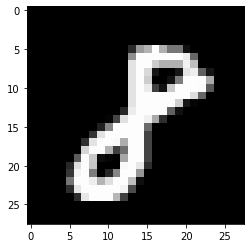

In [0]:
plt.imshow(x_train[31], cmap='gray')

In [0]:
print(x_train[30])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  11  19  95 143 143 143 143 143 143 143 143  33   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  90 149 208 253 253 253 253 253 253 253 253 253 25

In [0]:
x_train.dtype

dtype('uint8')

In [0]:
#convert data to float32 and normalize the input data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [0]:
x_train.dtype

dtype('float32')

In [0]:
#Reshape input from (28,28) to (28,28,1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
#inspect the training and testing data shape
print('x train shape', x_train.shape, 'y train shape', y_train.shape)
print('x test shape', x_test.shape, 'y test shape', y_test.shape)

x train shape (60000, 28, 28, 1) y train shape (60000,)
x test shape (10000, 28, 28, 1) y test shape (10000,)


In [0]:
#one-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Model Training

In [0]:
def create_model():
  # Define the model architecture
  model = keras.models.Sequential([
    # Must define the input shape in the first layer of the neural network
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),

    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax') # Correspond to 10 classes we want to classify 
  ])

  # Compile the model
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])
  return model

In [0]:
model = create_model()

# Take a look at the model summery
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
__________________________________________________

In [0]:
%%time
model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1933 - accuracy: 0.9428
Epoch 2/3
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0552 - accuracy: 0.9828
Epoch 3/3
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0409 - accuracy: 0.9874
CPU times: user 11.3 s, sys: 1.69 s, total: 13 s
Wall time: 15.9 s


**Model Evaluation**

In [0]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('Test loss', test_loss)
print('Test accuracy', test_accuracy)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0376 - accuracy: 0.9873
Test loss 0.037583154448727146
Test accuracy 0.9873


In [0]:
predictions = model.predict(x_test)

In [0]:
index = 124

In [0]:
np.argmax(predictions[index])

7

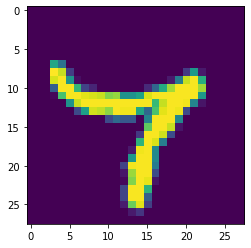

In [0]:
plt.imshow(np.squeeze(x_test[index]))

**Model Conversion tf.Keras to TFLite**

In [0]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [0]:
tflite_model = converter.convert()

**Evaluate the TFLite model**

In [0]:
index = 8
test_image = x_test[index]
test_image.shape

(28, 28, 1)

In [0]:
# Add batch dimension since a tensor expects the shape of (batch, image, image width, color channel)
test_image = np.expand_dims(test_image, axis = 0).astype(np.float32)
test_image.shape

(1, 28, 28, 1)

Below show are some bollerplate low level TensorFlow code for running the interpreter

In [0]:
# load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensor index
input_tensor_index = interpreter.get_input_details()[0]['index']
output_tensor_index = interpreter.get_output_details()[0]['index']

# Set the value of the input tensor as the test image
interpreter.set_tensor(input_tensor_index, test_image)

# Run inference with the interpreter
interpreter.invoke()

Compareing of the tflite model prediction with the original tf.Keras model prediction

In [0]:
# A digit that the tflite model predicts
tflite_prediction = interpreter.get_tensor(output_tensor_index)
np.argmax(tflite_prediction)

5

In [0]:
# A digit that the tf.Keras model predicts
model_prediction = model(tf.constant(test_image))
np.argmax(model_prediction)

5

Save and download the TFLite model

Saving the TFLite model into a file

In [0]:
tflite_model_filename = 'mnist.tflite'
# Open a file for writing in binary mode
file = open(tflite_model_filename, 'wb')
# Write to the file
file.write(tflite_model)
file.close()

Download the tflite model

In [0]:
import os
os.listdir('.')

['.config', 'mnist.tflite', 'sample_data']

In [0]:
# Download the .tflite model file for deployment to android
from google.colab import files
files.download(tflite_model_filename)